In [1]:
#1 Data Extraction
#2 EDA, Exploratory Data Analysis
#3 Feature Engineering -> Data Cleaning, Grouping, One-hot encoding
#4 Build Model 
#5 Model Evaluation
#6 Output, Presentaion & Visualzation 

In [115]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## EDA 

In [116]:
df_train = pd.read_csv('Titanic/train.csv')
df_test = pd.read_csv('Titanic/test.csv')

In [99]:
#check number of record
print('training set size')
print(df_train.shape)

print('test set size')
print(df_test.shape)

training set size
(891, 12)
test set size
(418, 11)


In [24]:
# check sample data
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


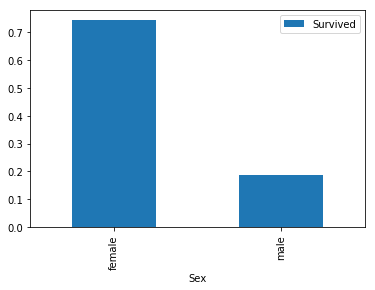

In [25]:
df_train[['Sex','Survived']].groupby('Sex').mean().plot.bar()

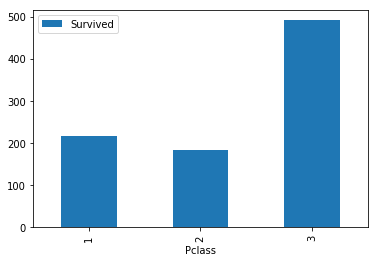

In [26]:
df_train[['Pclass','Survived']].groupby('Pclass').count().plot.bar()

In [27]:
use_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']

In [28]:
df_train = df_train[use_cols]
df_test = df_test[use_cols]

In [29]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [30]:
df_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [32]:
df_train['Pclass'].groupby(df_train['Pclass']).count().sort_values(ascending=False)

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

In [33]:
sum(df_train['Sex'] == 'female')

314

In [44]:
df_train.groupby('Age')['Survived'].agg(['mean'])

,mean
Age,
0.42,1.000000
0.67,1.000000
0.75,1.000000
0.83,1.000000
0.92,1.000000
1.00,0.714286
2.00,0.300000
3.00,0.833333
4.00,0.700000


In [43]:
df_train.groupby('Pclass')['Survived'].agg(['mean'])

,mean
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [41]:
df_train.groupby('Pclass')['Survived'].agg(['mean'])

,mean
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [42]:
sum(df_train['Survived'] == 1)

342

In [40]:
sum(df_train['Survived'] == 0)

549

In [ ]:
549+342

In [ ]:
(549*0 + 342*1)/891

## Feature Engineering

In [45]:
# Fill missing value
# Grouping
# string to interger

In [117]:
# Fill missing value
# Age
# Cabin
# Embarked

mean_age= (df_train['Age'].sum()+ df_test['Age'].sum())/(sum(df_train['Age'].notnull()+sum(df_test['Age'].notnull())))

In [105]:
(sum(df_train['Age'].notnull()+sum(df_test['Age'].notnull())))

296526

In [118]:
df_train['Age'] = df_train['Age'].fillna(mean_age)
df_test['Age'] = df_test['Age'].fillna(mean_age)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [81]:
df_train['Cabin']= df_train['Cabin'].apply(lambda x:str(x)[0])
df_test['Cabin'] = df_test['Cabin'].apply(lambda x:str(x)[0])

In [75]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [76]:
df_test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [101]:
df_train['Cabin'] = df_train['Cabin'].fillna('X')
df_test['Cabin'] = df_test['Cabin'].fillna('X')

In [119]:
df_train['Age'] = df_train['Age']//10

In [120]:
df_test['Age'] = df_test['Age']//10

In [122]:
df_train.groupby('Age')['Survived'].agg(['mean','count'])

,mean,count
Age,,
0.0,0.376569,239
1.0,0.401961,102
2.0,0.350000,220
3.0,0.437126,167
4.0,0.382022,89
5.0,0.416667,48
6.0,0.315789,19
7.0,0.000000,6
8.0,1.000000,1


In [123]:
#one hot encoding

In [128]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['Sex'])],axis=1)

In [126]:
pd.get_dummies(df_train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0
